In [1]:
pwd

'/Users/kelly/metis_v3/Project_3'

In [2]:
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as pd_sql

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import pickle

In [3]:
#Postgres connection information

connection_args = {
    'host': '13.59.191.205', #Update IP here
    'user': 'ubuntu',
    'dbname':'beer_style',
    'port':5432
}

connection = pg.connect(**connection_args)

Beer Style Lookup Tables:

In [4]:
query = 'SELECT style, styleid, ipa FROM styles WHERE ipa = 1'

ipa_styles = pd_sql.read_sql(query, connection)

In [5]:
ipa_styles

,style,styleid,ipa
0,American IPA,7,1
1,Double IPA,56,1
2,English IPA,65,1
3,Imperial IPA,86,1
4,None,111,1
5,Specialty IPA: Belgian IPA,147,1
6,Specialty IPA: Black IPA,148,1
7,Specialty IPA: Brown IPA,149,1
8,Specialty IPA: Red IPA,150,1
9,Specialty IPA: Rye IPA,151,1


In [6]:
apa_query = 'SELECT style, styleid, ipa FROM styles WHERE apa = 1'
lager_query = 'SELECT style, styleid, ipa FROM styles WHERE lager = 1'
stout_query = 'SELECT style, styleid, ipa FROM styles WHERE stout = 1'
porter_query = 'SELECT style, styleid, ipa FROM styles WHERE porter = 1'
saison_query = 'SELECT style, styleid, ipa FROM styles WHERE saison = 1'
kolsch_query = 'SELECT style, styleid, ipa FROM styles WHERE kolsch = 1'
ale_query = 'SELECT style, styleid, ipa FROM styles WHERE ale = 1'
wheat_query = 'SELECT style, styleid, ipa FROM styles WHERE wheat = 1'
gose_query = 'SELECT style, styleid, ipa FROM styles WHERE gose = 1'
barleywine_query = 'SELECT style, styleid, ipa FROM styles WHERE barleywine = 1'
pilsner_query = 'SELECT style, styleid, ipa FROM styles WHERE pilsner = 1'
other_query = 'SELECT style, styleid, ipa FROM styles WHERE other = 1'


apa_styles = pd_sql.read_sql(apa_query, connection)
lager_styles = pd_sql.read_sql(lager_query, connection)
stout_styles = pd_sql.read_sql(stout_query, connection)
porter_styles = pd_sql.read_sql(porter_query, connection)
saison_styles = pd_sql.read_sql(saison_query, connection)
kolsch_styles = pd_sql.read_sql(kolsch_query, connection)
ale_styles = pd_sql.read_sql(ale_query, connection)
wheat_styles = pd_sql.read_sql(wheat_query, connection)
gose_styles = pd_sql.read_sql(gose_query, connection)
barleywine_styles = pd_sql.read_sql(barleywine_query, connection)
pilsner_styles = pd_sql.read_sql(pilsner_query, connection)
other_styles = pd_sql.read_sql(other_query, connection)

In [7]:
apa_styles

,style,styleid,ipa
0,American Pale Ale,10,0
1,None,111,1


In [8]:
lager_styles

,style,styleid,ipa
0,American Lager,8,0
1,American Light Lager,9,0
2,Czech Amber Lager,47,0
3,Czech Dark Lager,48,0
4,Czech Pale Lager,49,0
5,Czech Premium Pale Lager,50,0
6,Dark American Lager,52,0
7,International Amber Lager,88,0
8,International Dark Lager,89,0
9,International Pale Lager,90,0


In [9]:
stout_styles

,style,styleid,ipa
0,American Stout,12,0
1,Dry Stout,58,0
2,Foreign Extra Stout,72,0
3,Imperial Stout,87,0
4,Irish Extra Stout,91,0
5,Irish Stout,93,0
6,None,111,1
7,Oatmeal Stout,114,0
8,Russian Imperial Stout,132,0
9,Sweet Stout,162,0


In [10]:
porter_styles

,style,styleid,ipa
0,American Porter,11,0
1,Baltic Porter,19,0
2,Brown Porter,37,0
3,English Porter,66,0
4,None,111,1
5,Pre-Prohibition Porter,126,0
6,Robust Porter,129,0


In [11]:
saison_styles

,style,styleid,ipa
0,None,111,1
1,Saison,134,0


In [12]:
kolsch_styles

,style,styleid,ipa
0,Kölsch,94,0
1,None,111,1


In [13]:
ale_styles

,style,styleid,ipa
0,American Amber Ale,4,0
1,American Brown Ale,6,0
2,American Strong Ale,13,0
3,Australian Sparkling Ale,17,0
4,Belgian Blond Ale,20,0
5,Belgian Dark Strong Ale,21,0
6,Belgian Golden Strong Ale,23,0
7,Belgian Pale Ale,24,0
8,Belgian Specialty Ale,25,0
9,Blonde Ale,30,0


In [14]:
wheat_styles

,style,styleid,ipa
0,American Wheat Beer,14,0
1,American Wheat or Rye Beer,15,0
2,Berliner Weisse,27,0
3,Dunkles Weissbier,61,0
4,Weissbier,169,0
5,Weizen/Weissbier,170,0
6,Wheatwine,172,0
7,Witbier,175,0


In [15]:
gose_styles

,style,styleid,ipa
0,Gose,82,0
1,None,111,1


In [16]:
other_styles

,style,styleid,ipa
0,Altbier,1,0
1,Alternative Grain Beer,2,0
2,Alternative Sugar Beer,3,0
3,Apple Wine,16,0
4,Autumn Seasonal Beer,18,0
5,Belgian Dubbel,22,0
6,Belgian Tripel,26,0
7,Best Bitter,28,0
8,Bière de Garde,29,0
9,Braggot,32,0


In [17]:
barleywine_styles

,style,styleid,ipa
0,American Barleywine,5,0
1,English Barleywine,63,0
2,None,111,1


In [18]:
pilsner_styles

,style,styleid,ipa
0,Bohemian Pilsener,31,0
1,Classic American Pilsner,40,0
2,German Pilsner (Pils),81,0


Beer Lists:

In [19]:
#IPA

beers_query = '''

SELECT Name, a.Style, a.StyleID FROM beers as 
a INNER JOIN styles as b 
on a.StyleID = b.StyleID

WHERE ipa = 1
'''

pd_sql.read_sql(beers_query, connection)

,name,style,styleid
0,Mango Habanero IPA,Imperial IPA,86
1,Bakke Brygg HveteIPA 25 L,American IPA,7
2,Sam Adams Rebel IPA Clone,American IPA,7
3,White IPA,American IPA,7
4,Bells two hearted clone,American IPA,7
5,Avg. Perfect Northeast IPA (NEIPA),American IPA,7
6,Goose Island IPA Clone,English IPA,65
7,Ballast Point Sculpin Ale Clone,Imperial IPA,86
8,Lagunitas IPA Clone,English IPA,65
9,NEIPA Hoppy ( juicy) - Braumeister 20L,American IPA,7


In [20]:
#Other Beers

other_beers_query = '''

SELECT Name, a.Style, a.StyleID FROM beers as 
a INNER JOIN styles as b 
on a.StyleID = b.StyleID

WHERE b.other = 1

'''

others_df = pd_sql.read_sql(other_beers_query, connection)

In [21]:
#Total number of other beers

others_df.count()

name       13701
style      13701
styleid    13701
dtype: int64

In [22]:
#Most common other beer type is only 1,000, not enough to make new feature

others_df['style'].value_counts().head()

California Common Beer               1012
Extra Special/Strong Bitter (ESB)     620
Belgian Tripel                        537
Belgian Dubbel                        512
Spice  Herb  or Vegetable Beer        489
Name: style, dtype: int64

In [23]:
#Run one simple logistic regression to begin

beers_query = '''

SELECT BeerID, a.StyleID, Size, OG, FG, ABV,
       IBU, Color, BoilSize, BoilTime, BoilGravity, Efficiency,
       AllGrain, BIAB, PartialMash, extract, ipa FROM beers as 
a INNER JOIN styles as b 
on a.StyleID = b.StyleID

'''

ipa_df = pd_sql.read_sql(beers_query, connection)

In [24]:
ipa_df.head()

,beerid,styleid,size,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,allgrain,biab,partialmash,extract,ipa
0,1,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1,0,0,0,0
1,2,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,1,0,0,0,0
2,5,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1,0,0,0,0
3,6,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,0,0,0,0
4,8,45,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,1,0,0,0,0


In [25]:
X_ipa = ipa_df.iloc[:,2:-1]

In [26]:
y_ipa = ipa_df.iloc[:,-1]

In [27]:
X_ipa_train, X_ipa_test, y_ipa_train, y_ipa_test = train_test_split(X_ipa, y_ipa, test_size = 0.3, random_state = 4444)

In [28]:
train_ipa_df = X_ipa_train.copy()
train_ipa_df['ipa'] = y_ipa_train

In [29]:
train_ipa_df.head()

,size,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,allgrain,biab,partialmash,extract,ipa
51385,20.82,1.062,1.014,6.30,47.21,4.12,28.39,80,1.046,70.0,1,0,0,0,0
42838,25.00,1.055,1.010,5.81,49.75,5.40,20.00,75,1.068,70.0,1,0,0,0,1
63969,77.00,1.064,1.022,5.48,21.73,37.51,85.00,60,1.058,76.0,1,0,0,0,0
60933,15.00,1.058,1.012,6.03,33.21,35.27,15.00,60,1.058,60.0,1,0,0,0,0
62939,110.00,1.065,1.016,6.36,44.55,6.60,140.00,60,1.051,73.0,1,0,0,0,1


In [30]:
train_ipa_df['ipa_flag'] = train_ipa_df['ipa'].apply(lambda x: (x and 'IPA') or 0)
train_ipa_df.head()

,size,og,fg,abv,ibu,color,boilsize,boiltime,boilgravity,efficiency,allgrain,biab,partialmash,extract,ipa,ipa_flag
51385,20.82,1.062,1.014,6.30,47.21,4.12,28.39,80,1.046,70.0,1,0,0,0,0,0
42838,25.00,1.055,1.010,5.81,49.75,5.40,20.00,75,1.068,70.0,1,0,0,0,1,IPA
63969,77.00,1.064,1.022,5.48,21.73,37.51,85.00,60,1.058,76.0,1,0,0,0,0,0
60933,15.00,1.058,1.012,6.03,33.21,35.27,15.00,60,1.058,60.0,1,0,0,0,0,0
62939,110.00,1.065,1.016,6.36,44.55,6.60,140.00,60,1.051,73.0,1,0,0,0,1,IPA


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


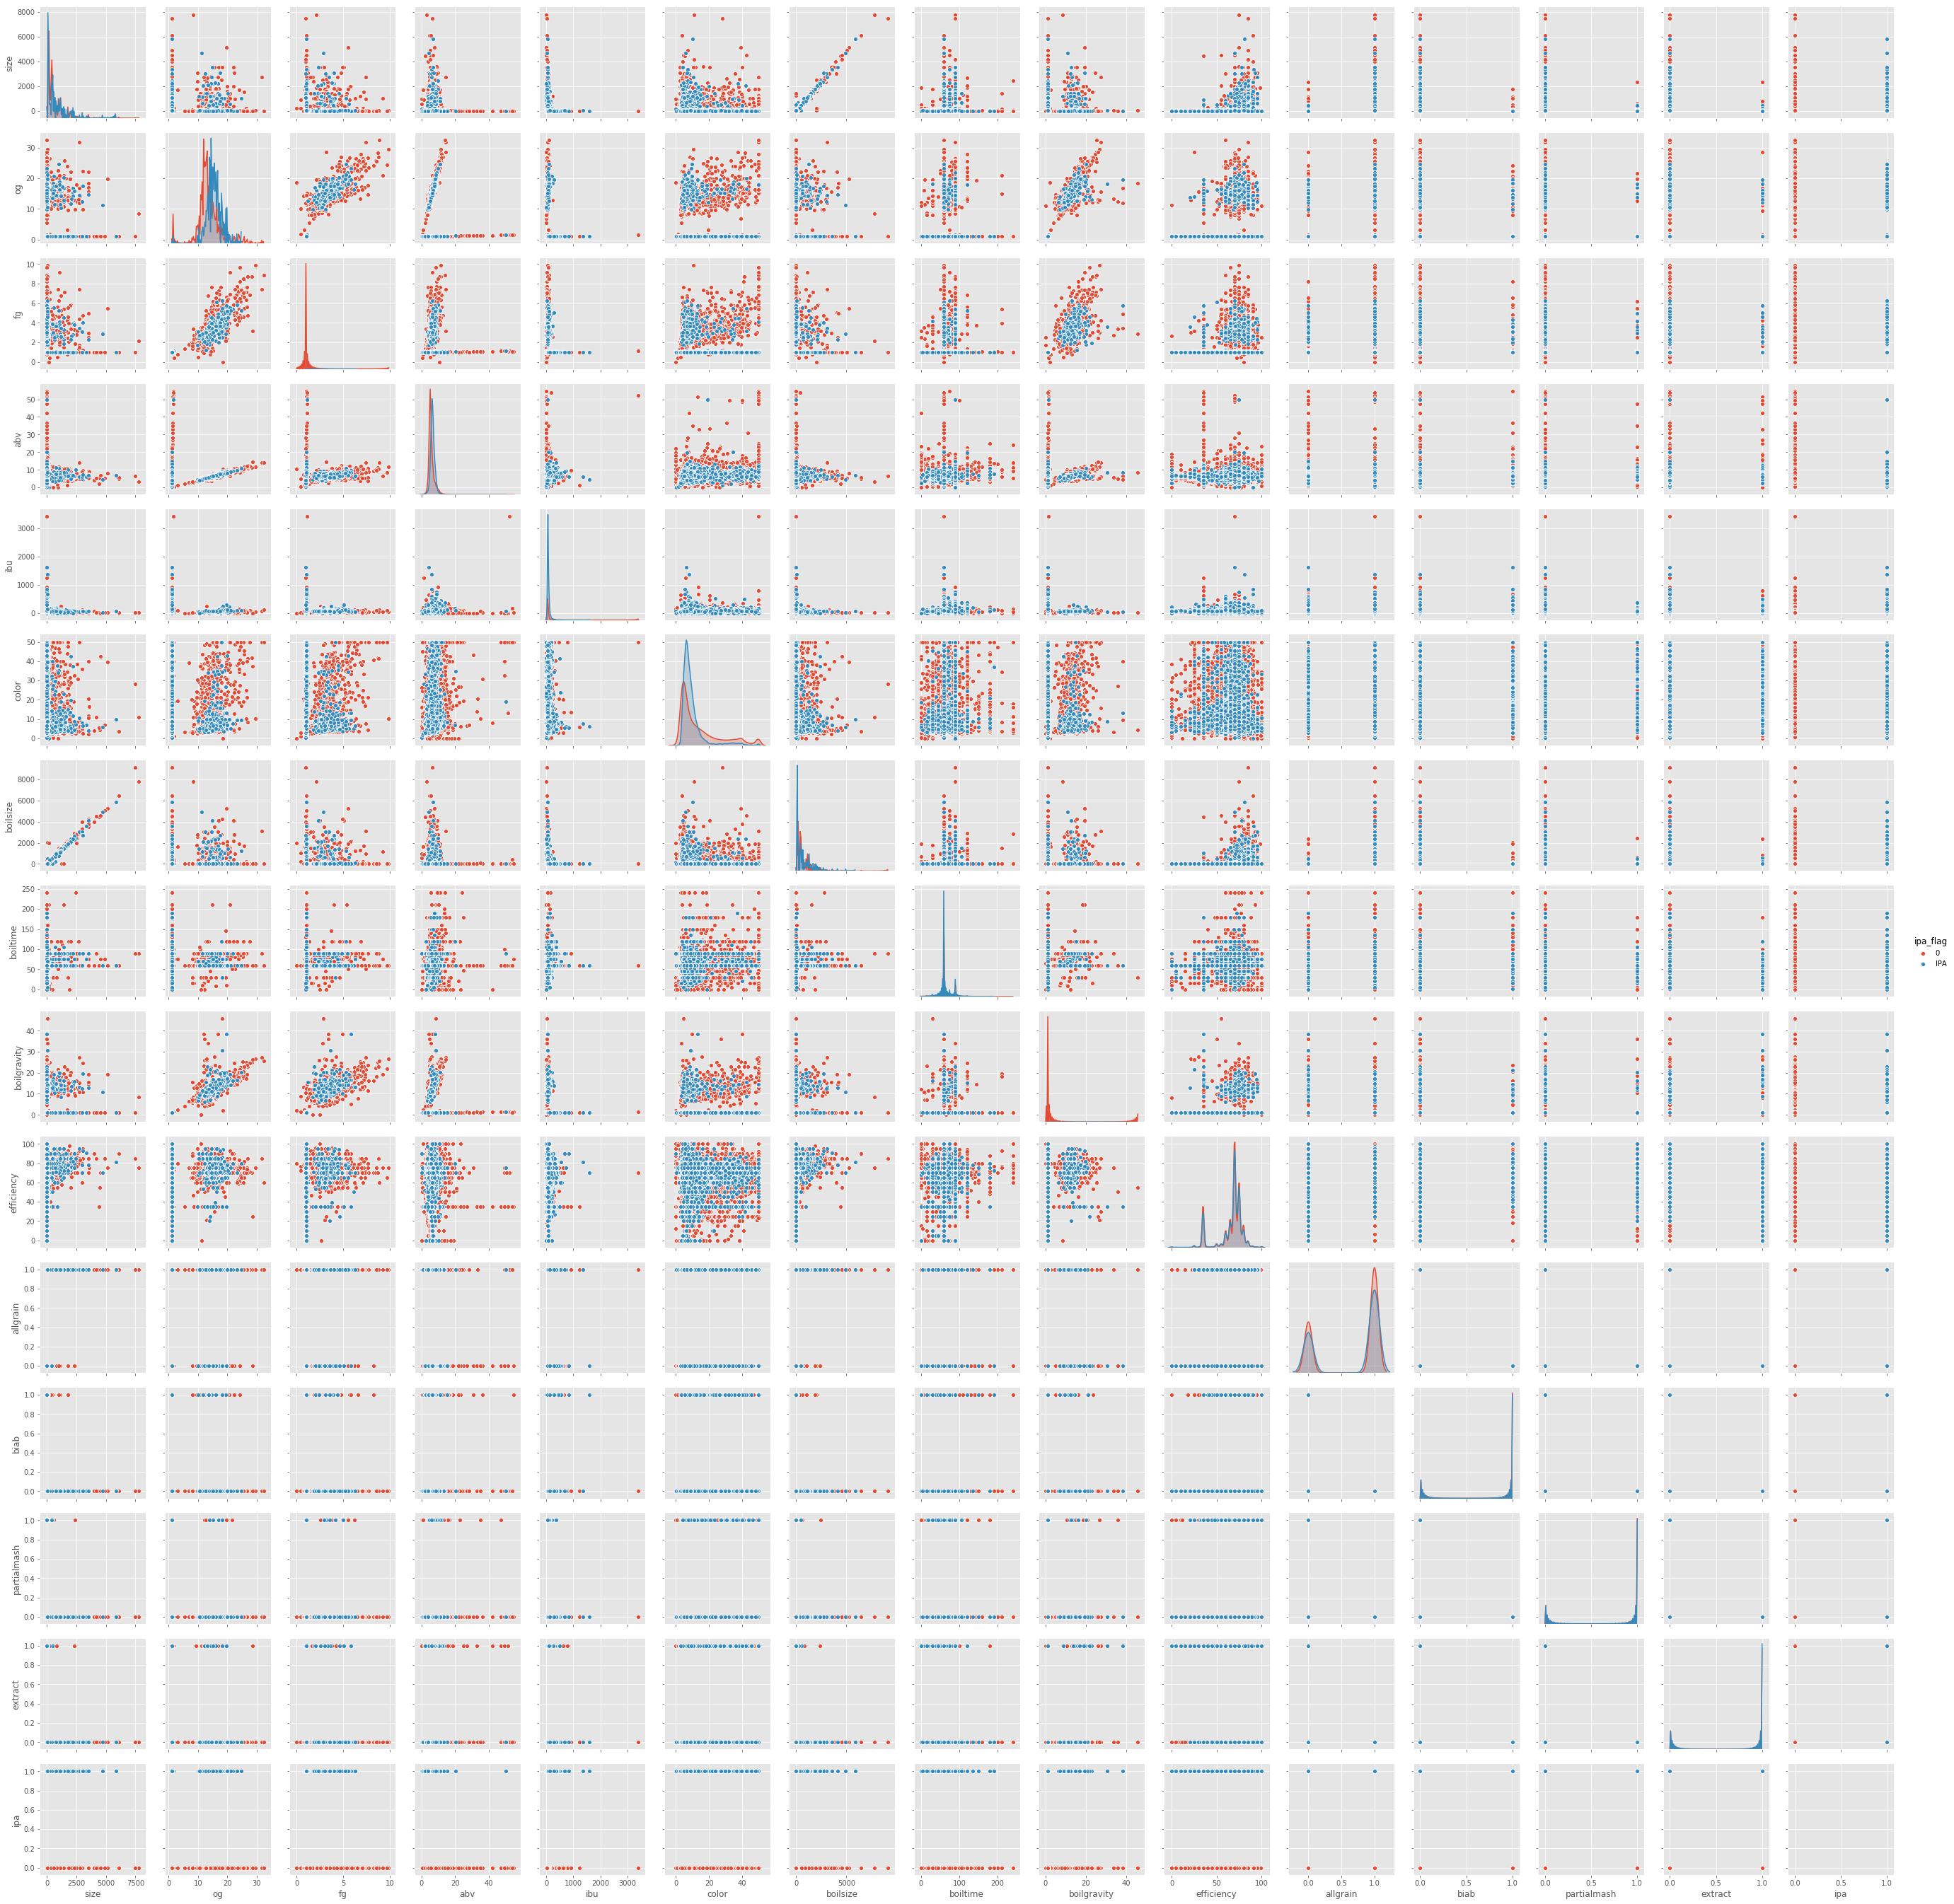

In [31]:
sns.pairplot(train_ipa_df, hue = 'ipa_flag')

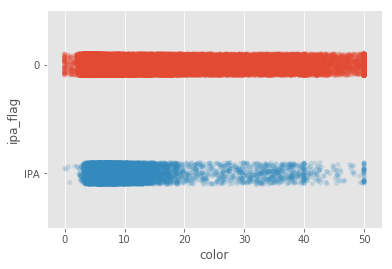

In [32]:
sns.stripplot(x = 'color', y = 'ipa_flag', jitter = True, data = train_ipa_df, alpha = 0.2)

In [33]:
ipa_log_model = LogisticRegression(C = 10)

In [34]:
ipa_log_model.fit(X_ipa_train[['color']],y_ipa_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
ipa_log_model.score(X_ipa_test[['color']], y_ipa_test)

0.7646057855927396

In [36]:
x_inputs = train_ipa_df[['color']].values

In [37]:
ipa_log_model.predict(X_ipa_train[['color']]).sum()

0

In [38]:
ipa_pred = ipa_log_model.predict(x_inputs)

In [39]:
#Predicting all zeros

ipa_pred[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [40]:
train_ipa_df.columns

Index(['size', 'og', 'fg', 'abv', 'ibu', 'color', 'boilsize', 'boiltime',
       'boilgravity', 'efficiency', 'allgrain', 'biab', 'partialmash',
       'extract', 'ipa', 'ipa_flag'],
      dtype='object')

In [41]:
ipa_mask = y_ipa_train == 1

Text(0.5,1,'Logistic Regression Prediction for IPA vs. Other Beer Styles')

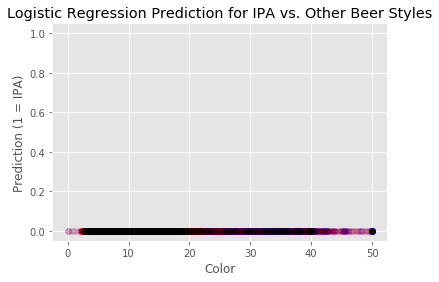

In [42]:
plt.plot(x_inputs[ipa_mask], ipa_pred[ipa_mask], 'bo', label='Actually IPA', alpha=0.05)
plt.plot(x_inputs[~ipa_mask], ipa_pred[~ipa_mask], 'ro', label='Not an IPA', alpha=0.005)
plt.xlabel('Color')
plt.ylabel('Prediction (1 = IPA)')
plt.ylim(-0.05, 1.05)
plt.title('Logistic Regression Prediction for IPA vs. Other Beer Styles')
#plt.legend(loc = 'lower right')

In [43]:
train_ipa_df['ipa'].shape

(49361,)

In [44]:
train_ipa_df['ipa'].sum()

11526

In [45]:
final_query = '''

SELECT *
FROM beers
LEFT JOIN styles ON beers.StyleID = styles.StyleID;

'''

beer_df = pd_sql.read_sql(final_query, connection)

In [46]:
beer_df.head()

,beerid,name,style,styleid,size,og,fg,abv,ibu,color,...,cider,saison,kolsch,ale,gose,barleywine,apa,wheat,pilsner,other
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,0,0,0,1,0,0,0,0,0,0
1,2,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,0,0,0,0,0,0,0,0,0,1
2,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,0,0,0,1,0,0,0,0,0,0
3,6,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,...,0,0,0,0,0,0,1,0,0,0
4,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,...,0,0,0,1,0,0,0,0,0,0


In [47]:
with open ('beer.pickle', 'wb') as to_write:
    pickle.dump(beer_df, to_write)